<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/FELIPE_MIRANDA_CARDOSO_DE_SA_6_classificacao_exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

A partir do que já foi visto até agora, vamos complicar um pouco o espaço de entrada e inserir dados da classe A e cercar os elementos classificados como classe B.



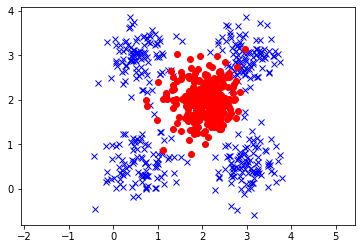

In [2]:
N=100
centrosClasseA = ((0.6,0.6),(0.6,3),(3,0.6), (3,3))
centrosClasseB = ((2.,2.))
cov = [[0.15, 0], [0, 0.15]] 

x = np.random.multivariate_normal(centrosClasseA[0], cov, N)
y = np.zeros((N,1))
x = np.concatenate((x,np.random.multivariate_normal(centrosClasseA[1], cov, N)), axis=0)
y = np.concatenate((y,np.zeros((N,1))),axis=0)

x = np.concatenate((x,np.random.multivariate_normal(centrosClasseA[2], cov, N)), axis=0)
y = np.concatenate((y,np.zeros((N,1))),axis=0)

x = np.concatenate((x,np.random.multivariate_normal(centrosClasseA[3], cov, N)), axis=0)
y = np.concatenate((y,np.zeros((N,1))),axis=0)

x = np.concatenate((x,np.random.multivariate_normal(centrosClasseB, cov, 3*N)), axis=0)
y = np.concatenate((y,np.ones((3*N,1))),axis=0)


A = np.where(y==0)[0]
B = np.where(y==1)[0]

plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
plt.axis('equal');

Vamos dividir os dados para treinamento e teste na próxima célula.

In [3]:
idx = np.linspace(0,len(y)-1,len(y),dtype=np.long)
np.random.shuffle(idx)
nTrain = int(len(x)*0.6)
x_train = x[idx[0:nTrain],:]
y_train = y[idx[0:nTrain]]

x_test = x[idx[nTrain:],:]
y_test = y[idx[nTrain:]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


A partir do que foi feito no último notebook, em um cenário mais simples, crie um classificador para os dados atuais.

Na próxima célula, você deve executar as ações relacionadas abaixo. Você deve obter bons resultados observando os limites indicados.

*   Crie um modelo com uma arquitetura multicamada. A rede deve ter uma entrada e uma saída (entre 2 e 5 camadas escondidas com até 25 neurônios). Lembre-se de usar uma função sigmoide na saída (fixa a saída no intervalo[0;1]).
*   defina a taxa de aprendizagem (entre 0.0001 e 0.1).
*   defina o erro usado
*   defina o otimizador
*   defina a quantidade de épocas (entre 5000 e 15000).


---
---







In [22]:
from torch.nn.modules.activation import Tanh
nInputs = 2
nOutput = 1
nHidden = 25
nEpochs = 10000

model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Tanh(),
    torch.nn.Linear(nHidden, nHidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(nHidden, nOutput),
    torch.nn.Sigmoid()
)

learningRate = 0.05

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)


---
---



In [23]:
if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


Epoch:0 errors: 0.7076914310455322 Correct classification:180/420
Epoch:200 errors: 0.6765799522399902 Correct classification:240/420
Epoch:400 errors: 0.6647318005561829 Correct classification:240/420
Epoch:600 errors: 0.6444962024688721 Correct classification:240/420
Epoch:800 errors: 0.6112799048423767 Correct classification:204/420
Epoch:1000 errors: 0.5652564764022827 Correct classification:306/420
Epoch:1200 errors: 0.5181564688682556 Correct classification:330/420
Epoch:1400 errors: 0.4824908673763275 Correct classification:341/420
Epoch:1600 errors: 0.4580894410610199 Correct classification:342/420
Epoch:1800 errors: 0.43989646434783936 Correct classification:344/420
Epoch:2000 errors: 0.4233558773994446 Correct classification:343/420
Epoch:2200 errors: 0.40142905712127686 Correct classification:342/420
Epoch:2400 errors: 0.37383317947387695 Correct classification:344/420
Epoch:2600 errors: 0.3406798243522644 Correct classification:349/420
Epoch:2800 errors: 0.3015857934951782 

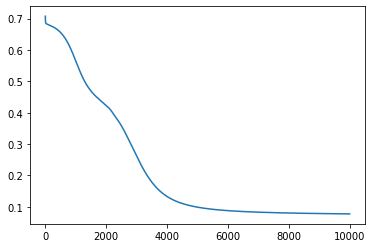

In [24]:
def train_model(nEpochs = 10):
  errors=[]
  for epoch in range(nEpochs):
    if torch.cuda.is_available():
      inputs = torch.tensor(x_train, dtype=torch.float32).to('cuda')
      targets = torch.tensor(y_train, dtype=torch.float32).to('cuda')
    else:
      inputs = torch.tensor(x_train, dtype=torch.float32)
      targets = torch.tensor(y_train,  dtype=torch.float32)    
    # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
    optimizer.zero_grad()
    # calculamos a saída da rede
    outputs = model(inputs)
    # calcula o erro
    loss = criterion(outputs, targets)
    # calcula os gradientes
    loss.backward()
    # atualiza parâmetros 
    optimizer.step()
    errors.append(loss.item())
    correct_classification = (torch.abs(outputs-targets)<0.5).sum()
    if(not epoch%200):
      print('Epoch:' + str(epoch) + ' errors: ' + str(loss.item()) + ' Correct classification:' + str(correct_classification.item()) + '/' + str(len(x_train)))
  return errors

errors = train_model(nEpochs) 
plt.plot(errors)

Vamos verificar agora o desempenho para os dados de teste, antes de visualizar a região de fronteira.

Definindo bem o modelo, você vai chegar em algo parecido com essa imagem

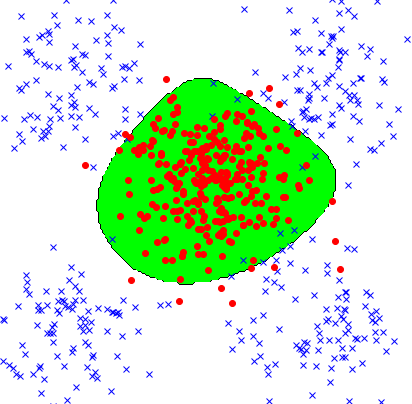

In [25]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    inputs = torch.tensor(x_test, dtype=torch.float32).to('cuda')
    targets = torch.tensor(y_test, dtype=torch.float32).to('cuda')
  else:
    inputs = torch.tensor(x_test, dtype=torch.float32)
    targets = torch.tensor(y_test,  dtype=torch.float32)  
  outputs = model(inputs)

correct_classification = (torch.abs(outputs-targets)<0.5).sum()
print(" Correct classifcation: " + str(correct_classification.item())+ '/'+str(len(y_test)))


 Correct classifcation: 271/280


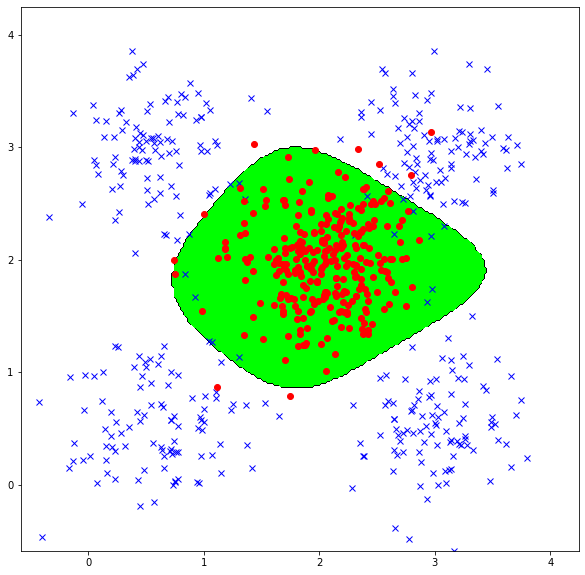

In [26]:
from matplotlib import cm
delta = 0.02
m = x_train.min()
M = 1.1*x_train.max()
X, Y = np.meshgrid(np.arange(m,M,delta),np.arange(m,M,delta))
inputs = []
for x0 in np.arange(m,M,delta):
  for x1 in np.arange(m,M,delta):
    inputs.append([x0,x1])
inputs = np.array(inputs)
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    inputs = torch.tensor(inputs, dtype=torch.float32).to('cuda')
  else:
    inputs = torch.tensor(inputs, dtype=torch.float32)
  saidas = model(inputs)
y_pred = saidas.detach().numpy()  
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0
L = int(np.sqrt(len(y_pred)))
y_pred = y_pred.reshape(L,L)
ax = plt.figure(figsize=(10,10))
plt.contourf(X, Y,y_pred, levels=2, colors=['#ffffff','#000000','#00ff00'])
plt.plot(x[A,0],x[A,1] , 'xb')
plt.plot(x[B,0],x[B,1] , 'or')
plt.axis([m,M,m,M]);